In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import glob
import soundfile as sf
import librosa
import librosa.display
import cv2
warnings.filterwarnings('ignore')

In [2]:
all_dir=os.listdir('../input/IIIT-HSLID/IIIT-H Dataset')
print(all_dir)
from collections import defaultdict
lang_dict=defaultdict(list)
for ele in all_dir:
    data=glob.glob('../input/IIIT-HSLID/IIIT-H Dataset/'+ele+'/*.wav')
    for s_f in data:
        lang_dict[ele].append(s_f)

['Malyalam', 'Tamil', 'Hindi', 'Bengali', 'Kannada', 'Telgu', 'Marathi']


In [3]:
sns.set(style='darkgrid')
input_df=pd.DataFrame()
input_df['Language']=lang_dict.keys()
input_df['Total Samples']=[len(lang_dict[k]) for k in lang_dict.keys()]
input_df

,Language,Total Samples
0,Malyalam,1000
1,Tamil,1000
2,Hindi,1000
3,Bengali,1000
4,Kannada,1000
5,Telgu,1000
6,Marathi,1000


<BarContainer object of 7 artists>

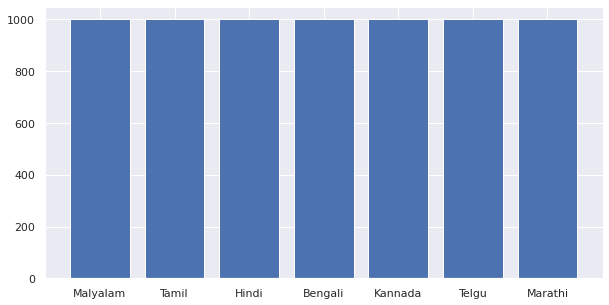

In [4]:
fig_1=plt.figure(figsize=(10,5))
ax=fig_1.add_subplot(1,1,1)
a,b=input_df['Language'].tolist(),input_df['Total Samples'].tolist()
plt.bar(a,b)

In [44]:
def output_duration(length):
    # Pass length as len(data)/samplerate to know length of audio file.
    hours = length // 3600  # calculate in hours
    length %= 3600
    mins = length // 60  # calculate in minutes
    length %= 60
    seconds = length  # calculate in seconds
    #print("Total Duration is: ",hours,":",mins,": ",seconds)
    return seconds

Sample Example to generate Mel-Spectrogram for Telgu Languages.

(128, 247)


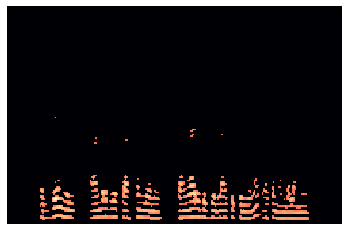

In [43]:
import librosa
import librosa.display
sig,fs=librosa.load(lang_dict['Telgu'][12])
time=output_duration(int(len(sig)/fs))
#print("Time Duration: ",time)
S=librosa.feature.melspectrogram(y=sig,sr=fs,n_fft=2048).astype('uint8')
S_pow=librosa.power_to_db(S,ref=np.max)
librosa.display.specshow(S_pow)
plt.axis('off')
print(S_pow.shape)

In [45]:
import math
def fix_audio_segment_to_30_seconds(audio_segment,time):
    # Taking sample rate as 22050.
    target_len = 30 * 22050
    if time<30:
      audio_segment = np.concatenate([audio_segment]*((int)(math.ceil(10/time))), axis=0)
    audio_segment = audio_segment[0:target_len]
    return audio_segment

In [46]:
from sklearn.preprocessing import MinMaxScaler
def spectrogram(audio_segment):
    # Compute Mel-scaled spectrogram image
    hl = 196 # image_width
    spec = librosa.feature.melspectrogram(audio_segment,
                                     n_mels=196, 
                                     hop_length=int(hl))

    # Logarithmic amplitudes
    image = librosa.core.power_to_db(spec)

    # Convert to numpy matrix
    image_np = np.asmatrix(spec)
    # For Preprocessing
    image_np = MinMaxScaler().fit_transform(image)
    # Controlling width of image
    res = image_np[:,:196]
    #print(res.shape)
    return res

In [47]:
def process(data,time):
    data_10=fix_audio_segment_to_30_seconds(data,time)
    #print("After Fixing to 30 second :",data_10.shape)
    arr_img=spectrogram(data_10) * 255
    arr_img=arr_img.astype('uint8')
    return arr_img

In [48]:
import librosa
import librosa.display
sig,fs=librosa.load(lang_dict['Hindi'][12],res_type='kaiser_fast')
time=output_duration(int(len(sig)/fs))
sample_arr=process(sig,time)

(129, 731)   (129,)   (731,)


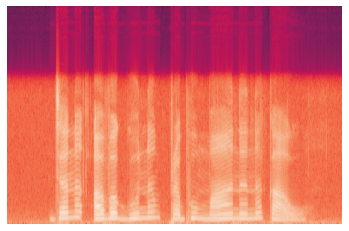

In [49]:
# Plotting a waveplot first
Pxx,row_spec,time,im=plt.specgram(sig,Fs=fs)
plt.axis('off')
print(Pxx.shape," ",row_spec.shape," ",time.shape)

(-0.5, 195.5, 195.5, -0.5)

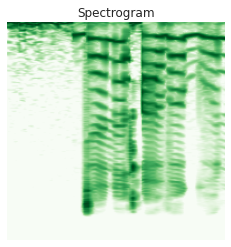

In [50]:
plt.imshow(sample_arr,cmap='Greens')
plt.title("Spectrogram")
plt.axis('off')

Plotting Spectrograms for Various Indic Languages.

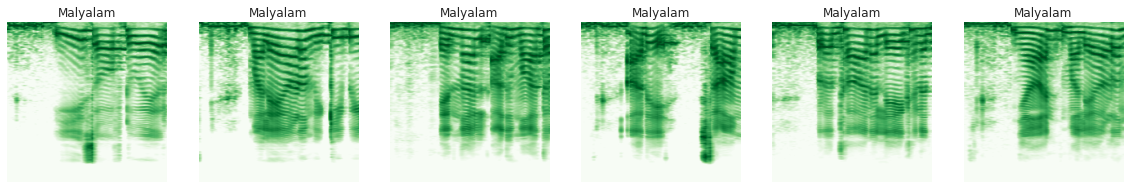

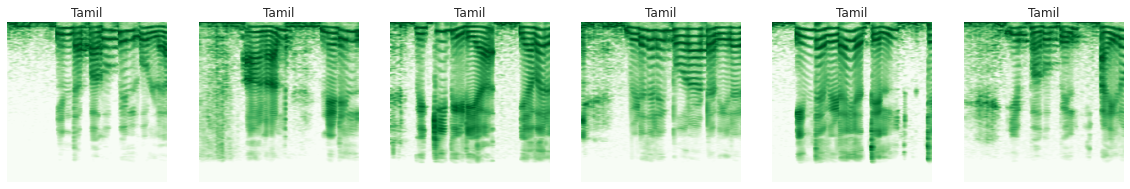

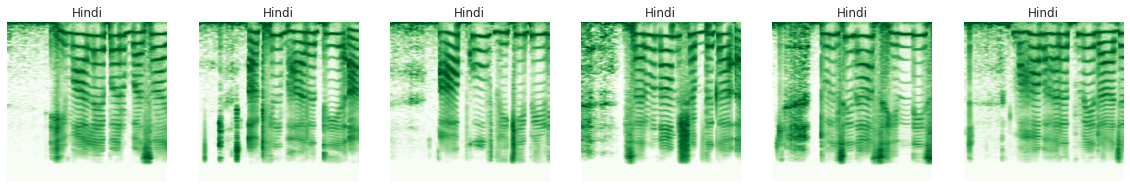

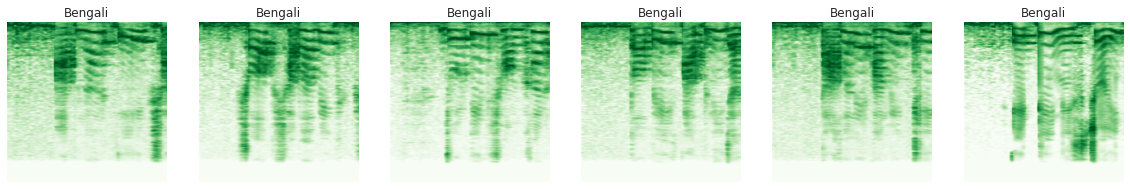

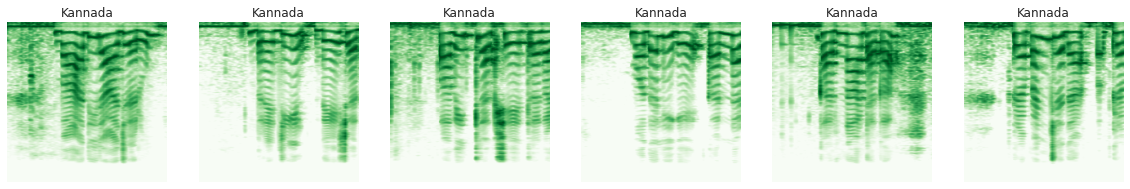

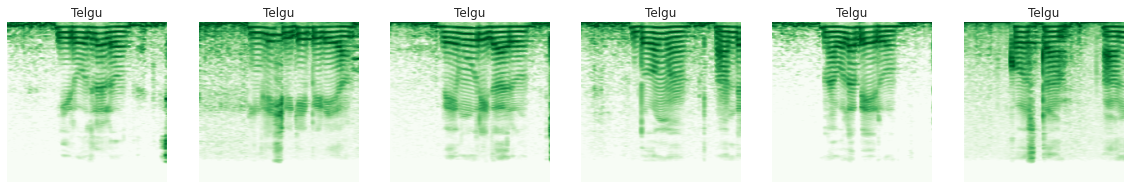

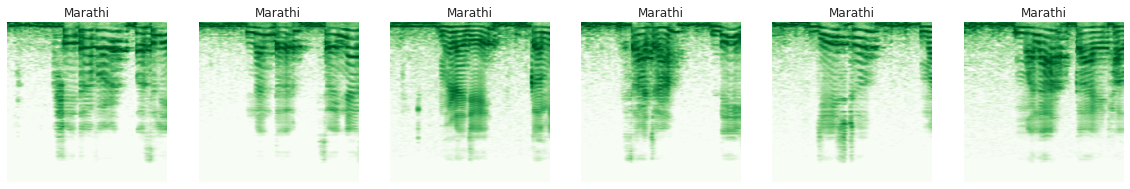

In [58]:
l,cnt_l=0,0
for ele in lang_dict.keys():
    cnt_l=0
    l+=1
    print("Collecting Info about: ",ele)
    fig_p=plt.figure(figsize=(20,10))
    for s_f in lang_dict[ele]:
        sig,fs=librosa.load(s_f,res_type='kaiser_fast')
        time=output_duration(int(len(sig)/fs))
        if time>0:
            sample_arr=process(sig,time)
            ax=fig_p.add_subplot(1,6,cnt_l+1)
            ax.set_title(ele)
            ax=plt.imshow(sample_arr,cmap='Greens')
            plt.axis('off')
            cnt_l+=1
            if cnt_l==6:
                break

In [68]:
# Converting our data into dataframe
# If you have X_train,Y_train,X_test,Y_train.npy files use them don't run this cell, saves time.
df_data=pd.DataFrame(columns=['Path','LID'])
cnt=0
lid_arr=list(lang_dict.keys())
for ele in lang_dict.keys():
    id=lid_arr.index(ele)
    print("LID for ",ele," is: ",id)
    for s_f in lang_dict[ele]:
        data,samplerate=librosa.load(s_f,res_type='kaiser_fast')
        time=output_duration(int(len(data)/samplerate))
        if time>0:
            df_data.loc[cnt]=[s_f,id]
            cnt+=1
    print("Total Item Collected: ",cnt)
df_data.head(10)

LID for  Malyalam  is:  0
Total Item Collected:  1000
LID for  Tamil  is:  1
Total Item Collected:  2000
LID for  Hindi  is:  2
Total Item Collected:  3000
LID for  Bengali  is:  3
Total Item Collected:  4000
LID for  Kannada  is:  4
Total Item Collected:  5000
LID for  Telgu  is:  5
Total Item Collected:  6000
LID for  Marathi  is:  6
Total Item Collected:  7000


,Path,LID
0,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0
1,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0
2,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0
3,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0
4,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0
5,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0
6,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0
7,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0
8,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0
9,../input/IIIT-HSLID/IIIT-H Dataset/Malyalam/ma...,0


In [70]:
df_data.to_csv('./LID_Dataframe.csv',index=False,header=True)

In [76]:
'''
from IPython.display import FileLink
FileLink('./LID_Dataframe.csv')
'''

"\nfrom IPython.display import FileLink\nFileLink('./LID_Dataframe.csv')\n"

In [98]:
# Converting to test and train data,
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_data['Path'],df_data['LID'],test_size=0.10,shuffle=True,stratify=df_data['LID'])
X_train,X_test,Y_train,Y_test=X_train.to_list(),X_test.to_list(),Y_train.to_list(),Y_test.to_list()
print(len(X_train)," ",len(Y_train))

6300   6300


<AxesSubplot:ylabel='count'>

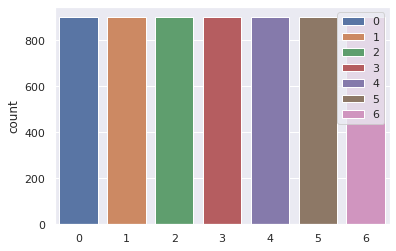

In [113]:
sns.set(style='darkgrid')
sns.countplot(x=Y_train,hue=Y_train,linewidth=1,dodge=False)

In [147]:
import librosa
import librosa.display
from sklearn.preprocessing import MinMaxScaler
X_train_arr,Y_train_arr,cnt=[],[],0
for ind in range(0,len(X_train)):
    audio=X_train[ind]
    data,samplerate=librosa.load(audio,res_type='kaiser_fast')
    time=output_duration(int(len(data)/samplerate))
    if time>0:
        X_train_arr.append(process(data,time))
        out_vec=np.zeros((1,7))
        out_vec[0][Y_train[ind]]=1
        Y_train_arr.append(out_vec)
        cnt+=1
        if(cnt%1000==0):
            print("Total Sample Collected: ",cnt)

Total Sample Collected:  1000
Total Sample Collected:  2000
Total Sample Collected:  3000
Total Sample Collected:  4000
Total Sample Collected:  5000
Total Sample Collected:  6000


In [213]:
import librosa
import librosa.display
from sklearn.preprocessing import MinMaxScaler
X_test_arr,Y_test_arr,cnt=[],[],0
for ind in range(0,len(X_test)):
    audio=X_test[ind]
    data,samplerate=librosa.load(audio,res_type='kaiser_fast')
    time=output_duration(int(len(data)/samplerate))
    if time>0:
        X_test_arr.append(process(data,time))
        out_vec=np.zeros((1,7))
        out_vec[0][Y_test[ind]]=1
        Y_test_arr.append(out_vec)
        cnt+=1
        if(cnt%100==0):
            print("Total Sample Collected: ",cnt)

Total Sample Collected:  100
Total Sample Collected:  200
Total Sample Collected:  300
Total Sample Collected:  400
Total Sample Collected:  500
Total Sample Collected:  600
Total Sample Collected:  700


In [185]:
X,Y=np.array(X_train_arr),np.array(Y_train_arr)
print(X.shape,Y.shape)

(6300, 196, 196) (6300, 1, 7)


In [186]:
# For 2-D Convolution
X=np.expand_dims(X,axis=-1)
X.shape

(6300, 196, 196, 1)

In [195]:
Y=Y.reshape(6300,7)
Y.shape

(6300, 7)

In [221]:
X_test_arr,Y_test_arr=np.array(X_test_arr),np.array(Y_test_arr)
Y_test_arr=Y_test_arr.reshape(700,7)
print(X_test_arr.shape,Y_test_arr.shape)

(700, 196, 196, 1) (700, 7)


Creating normal architecture of our model.

In [222]:
import tensorflow as tf
import keras

In [223]:
print("Tensorflow Version: ",tf.__version__)
print("Keras Version: ",keras.__version__)

Tensorflow Version:  2.6.4
Keras Version:  2.6.0


In [300]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Input,BatchNormalization
def create_model():
    model = Sequential(name='LID_Model')
    model.add(Conv2D(input_shape=(196,196,1),filters=64,kernel_size=(1,1),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(1,1),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(1,1), padding="same", activation="relu"))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(7,activation='softmax'))
    return model
    

In [346]:
lid_model=create_model()
lid_model.summary()

Model: "LID_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 196, 196, 64)      128       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 98, 98, 128)       8320      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 49, 49, 128)       16512     
_________________________________________________________________
flatten_23 (Flatten)         (None, 307328)            0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                19

In [347]:
from tensorflow.keras import losses
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.001)
lid_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [348]:
summary_train=lid_model.fit(X,Y,epochs=5,shuffle=False,verbose=1,batch_size=32,
                            validation_data=(X_test_arr,Y_test_arr))

Epoch 1/5
197/197 [==============================] - 8s 40ms/step - loss: 164.7797 - accuracy: 0.6114 - val_loss: 0.9459 - val_accuracy: 0.6471
Epoch 2/5
197/197 [==============================] - 8s 39ms/step - loss: 0.4704 - accuracy: 0.8494 - val_loss: 0.3377 - val_accuracy: 0.8871
Epoch 3/5
197/197 [==============================] - 8s 39ms/step - loss: 0.6671 - accuracy: 0.8949 - val_loss: 0.1660 - val_accuracy: 0.9457
Epoch 4/5
197/197 [==============================] - 8s 39ms/step - loss: 0.1466 - accuracy: 0.9529 - val_loss: 0.0991 - val_accuracy: 0.9686
Epoch 5/5
197/197 [==============================] - 8s 39ms/step - loss: 0.1218 - accuracy: 0.9579 - val_loss: 0.1002 - val_accuracy: 0.9643


In [350]:
import gc
gc.collect()

23

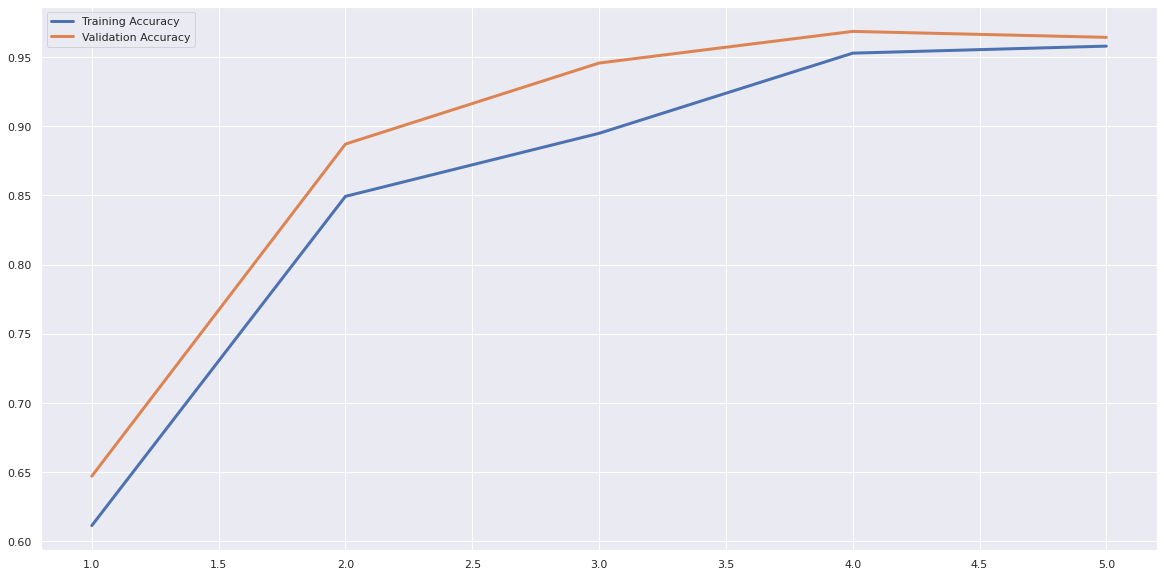

In [353]:
from matplotlib import markers
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
ax=sns.lineplot(x=[epoch for epoch in range(1,6)],y=summary_train.history['accuracy'],linewidth=3,markers=True)
ax=sns.lineplot(x=[epoch for epoch in range(1,6)],y=summary_train.history['val_accuracy'],linewidth=3,markers=True)
plt.legend(['Training Accuracy','Validation Accuracy'])

In [355]:
lid_model.evaluate(X_test_arr,Y_test_arr)

22/22 [==============================] - 0s 16ms/step - loss: 0.1002 - accuracy: 0.9643


[0.10020981729030609, 0.9642857313156128]

In [366]:
y_pred=lid_model.predict(X_test_arr)
for ind in range(0,y_pred.shape[0]):
    y_pred[ind]=np.where(y_pred[ind]==np.max(y_pred[ind]),1,0)
y_pred

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [378]:
def confusion_matrix_class(conf,ind):
    print("Confusion Matrix For: ",ind)
    tp,fn,fp,tn=conf[0][0],conf[0][1],conf[1][0],conf[1][1]
    print("\n")
    print("===========================================")
    print("Confusion Matrix: \n",conf)
    print("Precision = ",(tp/(tp+fp))*100)
    print("Recall = ",(tp/(tp+fn))*100)
    print("F-score = ",2*tp/(2*tp+fn+fp))
    print("Accuracy = ",((tp+tn)/(tp+tn+fp+fn))*100)
    print("True Positive Rate =",tp/(tp+fn))
    print("False Positive Rate =",fp/(fp+tn))
    print("===========================================")
    print("\n")

In [379]:
from sklearn.metrics import multilabel_confusion_matrix
conf=multilabel_confusion_matrix(y_pred,Y_test_arr)
cnt=0
for ele in conf:
    confusion_matrix_class(ele,lid_arr[cnt])
    cnt+=1

Confusion Matrix For:  Malyalam


Confusion Matrix: 
 [[591   2]
 [  9  98]]
Precision =  98.5
Recall =  99.6627318718381
F-score =  0.9907795473595976
Accuracy =  98.42857142857143
True Positive Rate = 0.9966273187183811
False Positive Rate = 0.08411214953271028


Confusion Matrix For:  Tamil


Confusion Matrix: 
 [[600  10]
 [  0  90]]
Precision =  100.0
Recall =  98.36065573770492
F-score =  0.9917355371900827
Accuracy =  98.57142857142858
True Positive Rate = 0.9836065573770492
False Positive Rate = 0.0


Confusion Matrix For:  Hindi


Confusion Matrix: 
 [[600   0]
 [  0 100]]
Precision =  100.0
Recall =  100.0
F-score =  1.0
Accuracy =  100.0
True Positive Rate = 1.0
False Positive Rate = 0.0


Confusion Matrix For:  Bengali


Confusion Matrix: 
 [[594  11]
 [  6  89]]
Precision =  99.0
Recall =  98.18181818181819
F-score =  0.9858921161825727
Accuracy =  97.57142857142857
True Positive Rate = 0.9818181818181818
False Positive Rate = 0.06315789473684211


Confusion Matrix For:  K